In [30]:
import numpy as np
import pandas as pd
from scipy.ndimage import imread
from matplotlib import pylab as plt

SVD is one of the matrix factorization tecniques. It factors a matrix into three parts with which we can reconstruct the initial matrix. However, reconstructing original matrix is not mostly the primary aim. Rather, we factorize matrices in order to achive following goals:

1. to find principal components
2. to reduce matrix size removing redundant dimentions
3. to find latent dimentions
4. visualization

In a simple terms, factorization can be defined as breaking something into its building blocks, in other terms, its factors. Using SVD, we can decompose a matrix into three separate matrices as follows:



$$ A_{m x n} = U_{m x r} * \Sigma_{r x r} * (V_{n x r})^{T} $$



where 
- U is the left singular vectors
- $\Sigma$ is the singular values sorted descending order along its diagonal, and full of zeroes elsewhere
- V is the right singular vectors
- m is the number of rows, 
- n is the number of columns(dimentions), 
- and r is the rank.

### Example

In [39]:
A = np.mat([
    [4, 5, 4, 1, 1],
    [5, 3, 5, 0, 0],
    [0, 1, 0, 1, 1],
    [0, 0, 0, 0, 1],
    [1, 0, 0, 4, 5],
    [0, 1, 0, 5, 4],
])

In [40]:
U, S, V = np.linalg.svd(A)
U.shape, S.shape, V.shape

((6, 6), (5,), (5, 5))

##### Left singular vectors

In [44]:
U

matrix([[ -6.60247087e-01,   2.26069179e-01,   5.21245353e-01,
           3.35555261e-01,   1.93472437e-01,  -3.02061047e-01],
        [ -6.08454501e-01,   3.95790275e-01,  -5.15698492e-01,
          -3.33151798e-01,  -1.94432412e-01,   2.41648837e-01],
        [ -1.01663330e-01,  -1.23192712e-01,   3.35077540e-01,
           1.99266003e-01,  -3.65560118e-02,   9.06183140e-01],
        [ -2.85198477e-02,  -7.22088959e-02,  -1.20759911e-01,
           5.43202407e-01,  -8.18365531e-01,  -1.20824419e-01],
        [ -3.04237047e-01,  -6.17102951e-01,  -4.95882375e-01,
           3.67195456e-01,   3.81958028e-01,   3.45227677e-16],
        [ -3.00246415e-01,  -6.25328844e-01,   2.99331094e-01,
          -5.53899132e-01,  -3.28350475e-01,  -1.20824419e-01]])

##### Singular values

In [48]:
S

array([ 11.09790031,   8.77186865,   2.12737197,   1.1338945 ,   0.28195919])

In [49]:
np.diag(S)

array([[ 11.09790031,   0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   8.77186865,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   2.12737197,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   1.1338945 ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.28195919]])

As you can see, the singular values are sorted descendingly.

##### Right singular values

In [55]:
V

matrix([[-0.53951628, -0.49815808, -0.51210235, -0.313581  , -0.31651043],
        [ 0.25834007,  0.1788895 ,  0.32869029, -0.62611284, -0.63340695],
        [-0.46507778,  0.79607137, -0.23198155,  0.17366444, -0.25690125],
        [ 0.03850227,  0.28546552, -0.28533338, -0.67545312,  0.61593422],
        [ 0.65146207,  0.06794765, -0.70319506,  0.15249073, -0.23074568]])

##### Reconstructing the original matrix

In [71]:
def reconstruct(U, S, V, rank):
    return U[:,0:rank] * np.diag(S[:rank]) * V[:rank]

r = len(S) 
reconstruct(U, S, V, r)

matrix([[  4.00000000e+00,   5.00000000e+00,   4.00000000e+00,
           1.00000000e+00,   1.00000000e+00],
        [  5.00000000e+00,   3.00000000e+00,   5.00000000e+00,
          -3.67959505e-16,  -1.56125113e-15],
        [ -9.90609674e-16,   1.00000000e+00,  -2.61737894e-16,
           1.00000000e+00,   1.00000000e+00],
        [ -1.26146165e-15,  -1.19057085e-16,   9.22639348e-16,
           2.17346585e-16,   1.00000000e+00],
        [  1.00000000e+00,   9.59868501e-16,  -2.12447460e-15,
           4.00000000e+00,   5.00000000e+00],
        [ -3.52644538e-16,   1.00000000e+00,  -3.34752709e-15,
           5.00000000e+00,   4.00000000e+00]])

We use all the dimentions to get back to the original matrix. As a result, we obtain the matrix which is almost identical. Let's calculate the difference between the two matrices.

In [72]:
def calcError(A, B):
    return np.sum(np.power(A - B, 2))

calcError(A, reconstruct(U, S, V, r))

1.147077259824516e-28

Expectedly, the error is infinitesimal.

However, most of the time this is not our intention. Instead of using all the dimentions(rank), we only use some of them, which have more variance, in other words, which provides more information. Let's see what we will get when using only the first three most significant dimentions.

In [74]:
reconstruct(U, S, V, 3)

matrix([[  3.94981237e+00,   4.88767823e+00,   4.14692509e+00,
           1.24868071e+00,   7.78234206e-01],
        [  5.05025903e+00,   3.11156219e+00,   4.85366219e+00,
          -2.46798640e-01,   2.20024748e-01],
        [ -1.98464008e-03,   9.36200386e-01,   5.72220686e-02,
           1.15418812e+00,   8.58453376e-01],
        [  1.26607196e-01,  -1.60149356e-01,   1.34873673e-02,
           4.51221266e-01,   5.67381466e-01],
        [  9.13808927e-01,  -1.26174412e-01,   1.94533364e-01,
           4.26480954e+00,   4.76839959e+00],
        [  8.44951491e-02,   1.18558107e+00,  -2.44310195e-01,
           4.58989058e+00,   4.36548284e+00]])

In [76]:
calcError(A, reconstruct(U, S, V, 3))

1.3652177156806771

Again, the reconstructed matrix is very similar to the original one. And the total error is still small. 

Now we can ask the question that which rank should we pick? There is trade-off that when you use more rank, you get closer to the original matrix and have less error, however you need to keep more data. On the other hand, if you use less rank, you will have much error but save space and remove the redundant dimentions and noise.

In [79]:
reconstruct(U, S, V, 2)

matrix([[ 4.46552909,  4.00492841,  4.40416543,  1.05610721,  1.06310757],
        [ 4.54003034,  3.98491818,  4.59915928, -0.05627442, -0.06181712],
        [ 0.32953887,  0.3687332 ,  0.22258654,  1.0303941 ,  1.04158147],
        [ 0.00712813,  0.04436238, -0.04610898,  0.49583588,  0.50138321],
        [ 0.42318617,  0.71362219, -0.05019007,  4.44801272,  4.49738771],
        [ 0.38065136,  0.67865191, -0.09658699,  4.47930305,  4.52907462]])

In [80]:
calcError(A, reconstruct(U, S, V, 2))

5.8909291953120331

In [33]:
A = np.mat([
    [4, 5, 4, 0, 4, 0, 0, 1, 0, 1, 2, 1],
    [5, 3, 5, 5, 0, 1, 0, 0, 2, 0, 0, 2],
    [0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1],
    [1, 0, 1, 0, 1, 5, 0, 0, 4, 5, 4, 0],
    [0, 1, 1, 0, 0, 4, 3, 5, 5, 3, 4, 0],
])

In [11]:
def reconstruct(U, S, V, rank):
    return U[:,0:rank] * np.diag(S[:rank]) * V[:rank]

In [13]:
for rank in range(1, len(S)):
    rA = reconstruct(U, S, V, rank)
    error = calcError(A, rA)
    coverage = S[:rank].sum() / S.sum()
    print("with rank {}, coverage: {:.4f}, error: {:.4f}".format(rank, coverage, error))

with rank 1, coverage: 0.3755, error: 164.0043
with rank 2, coverage: 0.6465, error: 57.1376
with rank 3, coverage: 0.7875, error: 28.2300
with rank 4, coverage: 0.9121, error: 5.6685
with rank 5, coverage: 0.9601, error: 2.3134


As it can be seen above, more rank is used, less error occur. From another perspective, we get closer to the original data by increasing rank number.

On the other hand, after a certain rank, using more rank will not contribute as much as 

Let's compare a reconstructed column to the original one by just naked eyes. Even it is reconstructed using only 4 dimention, we almost, with some error, get the original data.

In [29]:
print("Original:\n", A[:,10])
print("Reconstructed:\n", reconstruct(U, S, V, 4)[:,10])

Original:
 [[2]
 [0]
 [1]
 [0]
 [4]
 [4]]
Reconstructed:
 [[ 2.02371534]
 [ 0.03754208]
 [ 0.23000887]
 [ 0.12832794]
 [ 3.95717428]
 [ 4.068986  ]]


In [185]:
imread("data/pacman.png", flatten=True).shape

(128, 128)

In [186]:
A = np.mat(imread("data/pacman.png", flatten=True))

In [187]:
U, S, V = np.linalg.svd(A)

In [188]:
A.shape, U.shape, S.shape, V.shape

((128, 128), (128, 128), (128,), (128, 128))

In [189]:
for rank in range(1, len(S)):
    rA = reconstruct(U, S, V, rank)
    error = calcError(A, rA)
    coverage = S[:rank].sum() / S.sum()
    print("with rank {}, coverage: {:.4f}, error: {:.4f}".format(rank, coverage, error))

with rank 1, coverage: 0.6819, error: 8279833.0000
with rank 2, coverage: 0.7292, error: 4598676.0000
with rank 3, coverage: 0.7562, error: 3399851.5000
with rank 4, coverage: 0.7801, error: 2458954.5000
with rank 5, coverage: 0.8005, error: 1779067.8750
with rank 6, coverage: 0.8148, error: 1442356.2500
with rank 7, coverage: 0.8257, error: 1247373.2500
with rank 8, coverage: 0.8358, error: 1078366.2500
with rank 9, coverage: 0.8453, error: 929638.3750
with rank 10, coverage: 0.8534, error: 822231.3750
with rank 11, coverage: 0.8610, error: 728628.5000
with rank 12, coverage: 0.8681, error: 645863.2500
with rank 13, coverage: 0.8741, error: 586921.2500
with rank 14, coverage: 0.8796, error: 536669.7500
with rank 15, coverage: 0.8848, error: 492850.3750
with rank 16, coverage: 0.8896, error: 453479.6875
with rank 17, coverage: 0.8942, error: 418997.6875
with rank 18, coverage: 0.8986, error: 387050.1875
with rank 19, coverage: 0.9026, error: 361310.0938
with rank 20, coverage: 0.9065, 

(128, 128)


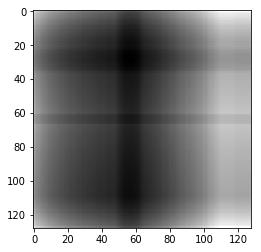

(128, 128)


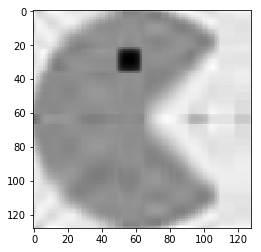

(128, 128)


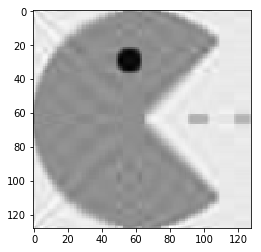

(128, 128)


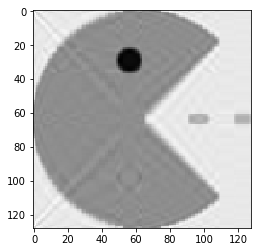

(128, 128)


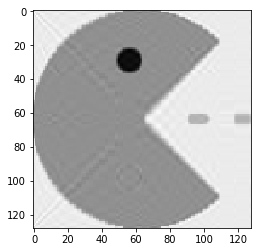

(128, 128)


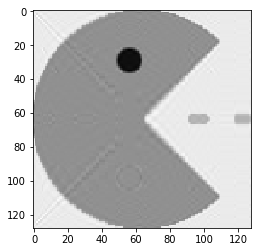

(128, 128)


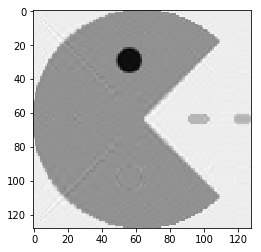

(128, 128)


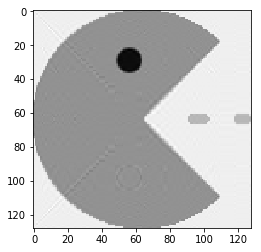

(128, 128)


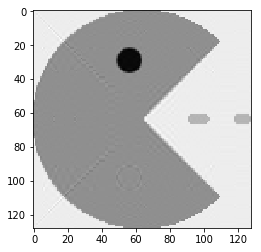

(128, 128)


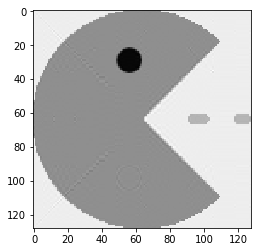

In [192]:
for i in range(1, 50, 5):
    rA = reconstruct(U, S, V, i)
    print(rA.shape)
    plt.imshow(rA, cmap='gray')
    plt.show()

In [ ]:
plt.imshow(data, interpolation='nearest')

In [164]:
128 * 128 

13824

In [165]:
- (10*128*2)

-2560

In [167]:
from PIL import Image
A = np.mat(imread("data/noise.png", flatten=True))
img = Image.open('data/noise.png')
imggray = img.convert('LA')

In [171]:
imgmat = np.array(list(imggray.getdata(band=0)), float)

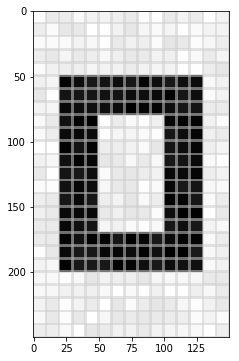

In [180]:

imgmat = np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(9,6))
plt.imshow(imgmat, cmap='gray');
plt.show()

In [181]:
U, S, V = np.linalg.svd(imgmat)

(250, 150)


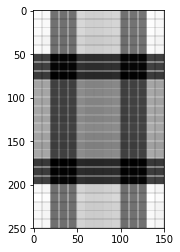

(250, 150)


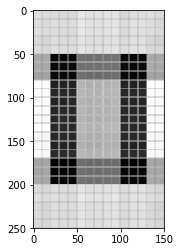

(250, 150)


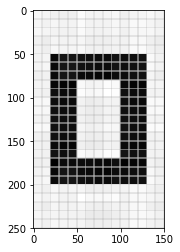

(250, 150)


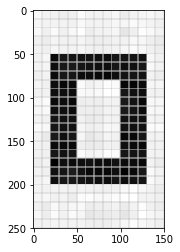

(250, 150)


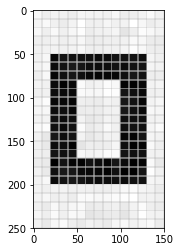

(250, 150)


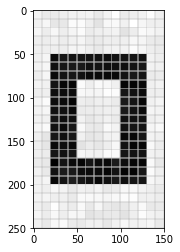

(250, 150)


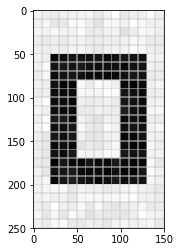

(250, 150)


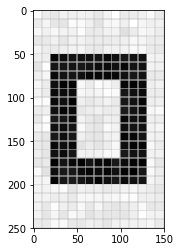

(250, 150)


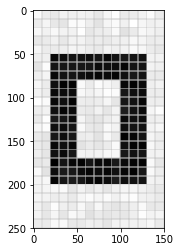

In [183]:
for i in range(1, 10, 1):
    rA = reconstruct(U, S, V, i)
    print(rA.shape)
    plt.imshow(rA, cmap='gray');
    plt.show()